<a href="https://colab.research.google.com/github/domywillygithub/Codes/blob/main/SES_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("/content/AlgeriaExport.txt", header=None)
index = pd.date_range(start="1960", end="2018", freq="Y")
df.set_index(index, inplace=True)
y = df[0].values

In [4]:
# Split into train and test
train_size = int(len(y) * 0.8)
train_y, test_y = y[:train_size], y[train_size:]

In [5]:
# Define SES function
def SES(y, alpha):
    T = len(y)
    l = np.zeros(T)
    l[0] = y[0]
    for t in range(1, T):
        l[t] = alpha * y[t-1] + (1 - alpha) * l[t-1]
    return l

In [6]:
# Find the value of alpha that minimizes the MSE on the train data
alpha_values = np.linspace(0, 1, 101)
MSE_values = np.zeros(len(alpha_values))
for i, alpha in enumerate(alpha_values):
    l_pred = SES(train_y, alpha)
    MSE_values[i] = np.sum((train_y - l_pred) ** 2) / len(train_y)
best_alpha = alpha_values[np.argmin(MSE_values)]
print("Best alpha:", best_alpha)
print("MSE on train data:", MSE_values[np.argmin(MSE_values)])

Best alpha: 0.78
MSE on train data: 37.37077305038269


In [7]:
# Compare with the value returned by statsmodels
model = SimpleExpSmoothing(train_y)
model_fit = model.fit()
print("Statsmodels parameters:", model_fit.model.params)
print("Statsmodels MSE:", model_fit.sse / len(train_y))

Statsmodels parameters: {'smoothing_level': 0.7779901111549695, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 39.39178724514565, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Statsmodels MSE: 37.367771081068604


In [8]:
# Predict test data using the best alpha
train_l = SES(train_y, best_alpha)
test_l = SES(test_y, best_alpha)
test_y_pred = best_alpha * test_y[-1] + (1 - best_alpha) * test_l[-1]
test_y_pred

22.443571346705276

In [9]:
# Fit model on train data
fitted_model = SimpleExpSmoothing(train_y).fit(smoothing_level=best_alpha)

# Forecast test data using the fitted model
test_predictions = fitted_model.forecast(len(test_y))

# Print the predicted values on the test data
print("Predicted values on test data:", test_predictions)

Predicted values on test data: [45.5190807 45.5190807 45.5190807 45.5190807 45.5190807 45.5190807
 45.5190807 45.5190807 45.5190807 45.5190807 45.5190807 45.5190807]


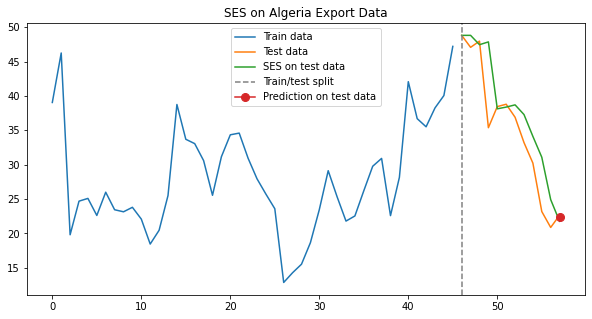

In [10]:
# Plot train, test, and predicted data
plt.figure(figsize=(10, 5))
plt.plot(train_y, label="Train data")
plt.plot(np.arange(train_size, len(y)), test_y, label="Test data")
plt.plot(np.arange(train_size, len(y)), test_l, label="SES on test data")
plt.axvline(x=train_size, linestyle="--", color="grey", label="Train/test split")
plt.plot(len(y)-1, test_y_pred, marker="o", markersize=8, label="Prediction on test data")
plt.legend()
plt.title("SES on Algeria Export Data")
plt.show()